In [1]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [4]:
import wikipedia

# Set a custom user agent to comply with Wikipedia's policy
wikipedia.set_user_agent("My Wikipedia Scraping Bot (youremail@example.com)")

# Corrected list of Wikipedia page titles
page_titles = [
    "Machine learning",
    "Deep learning",
    "Natural language processing",
    "Recurrent neural network",
    "Convolutional neural network",
    "Artificial intelligence",
    "Data science",
    "Supervised learning",
    "Unsupervised learning",
    "Reinforcement learning",
    "Support vector machine",
    "Decision tree",
    "Neural network",
    "Gradient boosting",
    "Cluster analysis",  
    "Random forest",
    "Dimensionality reduction",
    "Computer vision",
    "Transfer learning",
    "Anomaly detection"
]

# Dictionary to store page titles and their content
documents = {}

# Number of pages to fetch for each document topic
num_pages_per_topic = 10

# Fetch content for each page
for title in page_titles:
    try:
        # Fetch the page content
        pages = wikipedia.search(title, results=num_pages_per_topic, suggestion=False)
        
        # Verify if the search result matches the desired title
        matched_pages = [page for page in pages if page.lower() == title.lower()]
        if not matched_pages:
            print(f"Page '{title}' does not exist.")
            continue

        # Store the title and content in the dictionary
        documents[title] = "\n".join([wikipedia.page(page).content for page in matched_pages])
    except wikipedia.exceptions.PageError:
        print(f"Page '{title}' does not exist.")
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Page '{title}' is a disambiguation page. Skipping.")

# Combine all content into one string
all_content = "\n".join(documents.values())

# Print the combined content
print("Combined Content:")
print(all_content[:500])  # Print only the first 500 characters for demonstration


Page 'Machine learning' does not exist.
Page 'Decision tree' does not exist.
Page 'Computer vision' does not exist.
Combined Content:
Deep learning is the subset of machine learning methods based on neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.
Deep-learning architectures such as deep neural networks, deep belief networks, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural langua


In [5]:
len(all_content)

598254

In [30]:
import re
import numpy as np
import nltk
import spacy

import matplotlib.pyplot as plt

from spacy.cli import download
from spacy import load
import warnings

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [31]:
import nltk

nltk.download('punkt')

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet2022')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


True

In [13]:
class preprocessing:
    def __init__(self,text):
        self.text=text
        self.words=None
    def clear(self):
        clean = re.compile('<.*?>')
        self.text =  re.sub(clean, '', self.text)
        self.text= re.sub(r"[^a-zA-Z]"," ",self.text)
        self.text = re.sub(r'\s+', ' ', self.text)
    def Normalization(self):
        self.text=self.text.lower()
#         print(self.text)
    def Tokenization(self):
        self.words = word_tokenize(self.text)
#         print(self.words)
    def del_stop_words(self):
        stop_words = set(stopwords.words('english'))
        self.words=[word for word in self.words if (word not in stop_words)]
        
    def stemming(self):
        stemmer = PorterStemmer()
        self.words = [stemmer.stem(word) for word in self.words]
    def unique_words(self):
        self.words = list(set(self.words))
        return self.words
    def return_string(self):
        return ' '.join(self.words)
    def del_char (self):
        self.words=[word for word in self.words if (len(word)>1)]
        return self.words

In [14]:
def clean_document (document):
    cleaner = preprocessing(document)
    cleaner.clear()
    cleaner.Tokenization()
    cleaner.Normalization()
    cleaner.del_stop_words()
    cleaner.stemming()
    cleaner.del_char()
    output = cleaner.return_string()
    return output

In [15]:
clear = clean_document(all_content)

In [16]:
clear[:1500]

'deep learn subset machin learn method base neural network represent learn the adject deep refer use multipl layer network method use either supervis semi supervis unsupervis deep learn architectur deep neural network deep belief network recurr neural network convolut neural network transform appli field includ comput vision speech recognit natur languag process machin translat bioinformat drug design medic imag analysi climat scienc materi inspect board game program produc result compar case surpass human expert perform earli form neural network inspir inform process distribut commun node biolog system particular human brain howev current neural network intend model brain function organ gener seen low qualiti model purpos overview most modern deep learn model base multi layer neural network convolut neural network transform although also includ proposit formula latent variabl organ layer wise deep gener model node deep belief network deep boltzmann machin fundament deep learn refer cl

In [17]:
chars = sorted(set(clear))  # Unique characters in input text
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # Character to index mapping
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # Index to character mapping


In [18]:
indices_to_chars

{0: ' ',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [19]:
maxlen = 5  # Maximum length of input sequence
step = 3  # Step size for creating input sequences
sentences = []  # List to store input sequences
next_chars = []  # List to store next characters

In [20]:
for i in range(0, len(clear) - maxlen, step):
    sentences.append(clear[i:i + maxlen])
    next_chars.append(clear[i + maxlen])

In [21]:
sentences[:5]

['deep ', 'p lea', 'earn ', 'n sub', 'ubset']

In [22]:
x_char = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)  # Initialize input data tensor
y_char = np.zeros((len(sentences), len(chars)), dtype=bool)  # Initialize target data tensor


In [23]:
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x_char[i, t, chars_to_indices[char]] = 1
    y_char[i, chars_to_indices[next_chars[i]]] = 1

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_char, y_char, test_size=0.2, random_state=42)


In [25]:
import tensorflow as tf 

In [26]:
from tensorflow.keras.layers import Dense, SimpleRNN


In [36]:
# Define a more complex LSTM model with additional layers and regularization
model_complex_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(maxlen, len(chars)), dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.LSTM(256, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(len(chars), activation='softmax')
])

# Compile the model
model_complex_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Summary of the complex LSTM model
model_complex_lstm.summary()

# Train the complex LSTM model
history_complex_lstm = model_complex_lstm.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 256)            290816    
                                                                 
 lstm_5 (LSTM)               (None, 5, 256)            525312    
                                                                 
 lstm_6 (LSTM)               (None, 256)               525312    
                                                                 
 dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 1,348,379
Trainable params: 1,348,379
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
628/628 [==============================] - 49s 71ms/step - loss: 2.7407 - accuracy: 0.1992 - val_loss: 2.3832 - val_accuracy: 0.2882
Epoch 2/100
628/628 [==========

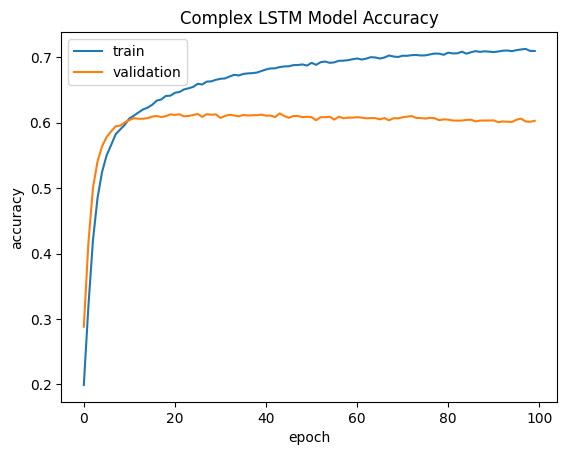

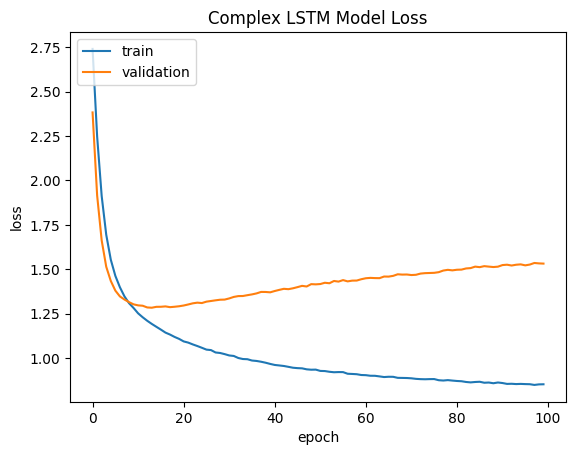

In [37]:
# Plot accuracy
plt.plot(history_complex_lstm.history['accuracy'])
plt.plot(history_complex_lstm.history['val_accuracy'])
plt.title('Complex LSTM Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_complex_lstm.history['loss'])
plt.plot(history_complex_lstm.history['val_loss'])
plt.title('Complex LSTM Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [38]:
results_complex_lstm = model_complex_lstm.evaluate(x_test, y_test)
print(results_complex_lstm)


628/628 [==============================] - 8s 13ms/step - loss: 1.5320 - accuracy: 0.6028
[1.5320408344268799, 0.6027697324752808]


In [39]:
def predict_next_chars(model, input_text, chars_to_indices, indices_to_chars, maxlen, num_chars=10):
    input_text = input_text.lower()
    predicted_text = input_text

    for _ in range(num_chars):
        input_seq = np.zeros((1, maxlen, len(chars_to_indices)), dtype=bool)
        for t, char in enumerate(input_text[-maxlen:]):
            if char in chars_to_indices:
                input_seq[0, t, chars_to_indices[char]] = 1

        prediction = model.predict(input_seq)
        next_index = np.argmax(prediction)
        next_char = indices_to_chars[next_index]

        predicted_text += next_char
        input_text += next_char

    return predicted_text

input_text = "machin "
predicted_chars_complex_lstm = predict_next_chars(model_complex_lstm, input_text, chars_to_indices, indices_to_chars, maxlen, num_chars=10)
print(f"The next 10 characters after '{input_text}' are predicted to be '{predicted_chars_complex_lstm}'")


1/1 [==============================] - 0s 36ms/step
The next 10 characters after 'machin ' are predicted to be 'machin learn algo'


# # # **SimpleRNN**

In [42]:
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define a more optimized SimpleRNN model
model_simple_rnn = tf.keras.Sequential([
    SimpleRNN(256, return_sequences=True, input_shape=(maxlen, len(chars)),
              dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)),
    SimpleRNN(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)),
    SimpleRNN(256, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(len(chars), activation='softmax')
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model_simple_rnn.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Summary of the new model
model_simple_rnn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 5, 256)            72704     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 5, 256)            131328    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 27)                6939      
                                                                 
Total params: 342,299
Trainable params: 342,299
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
1255/1255 [==============================] - 30s 23ms/step - loss: 3.4921 - accuracy: 0.1929 - val_loss: 2.7582 - val_accuracy: 0.2144
Epoch 2/50
1255/1255 [==============================] - 27s 21ms/step - loss: 2.8039 - accuracy: 0.2008 - val_loss: 2.7415 - val_accuracy: 0.2151
Epoch 3/50
1255/1255 [==============================] - 28s 22ms/step - loss: 2.7885 - accuracy: 0.2048 - val_loss: 2.7269 - val_accuracy: 0.2129
Epoch 4/50
1255/1255 [==============================] - 26s 21ms/step - loss: 2.7747 - accuracy: 0.2053 - val_loss: 2.6838 - val_accuracy: 0.2279
Epoch 5/50
1255/1255 [==============================] - 25s 20ms/step - loss: 2.7643 - accuracy: 0.2069 - val_loss: 2.6970 - val_accuracy: 0.2160
Epoch 6/50
1255/1255 [==============================] - 25s 20ms/step - loss: 2.7571 - accuracy: 0.2064 - val_loss: 2.6885 - val_accuracy: 0.2275
Epoch 7/50
1255/1255 [==============================] - 25s 20ms/step - loss: 2.7501 - accuracy: 0.2080 - val_loss: 2.6682 -

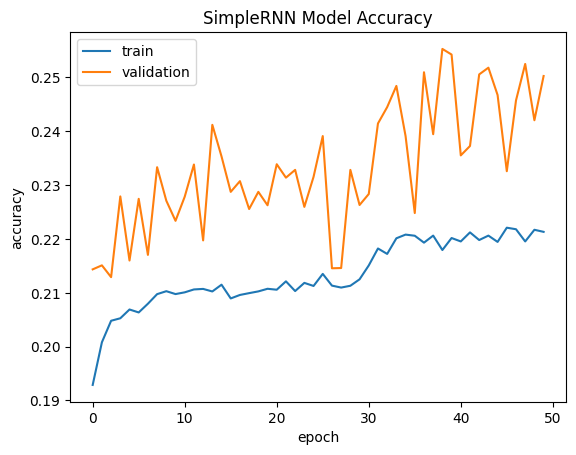

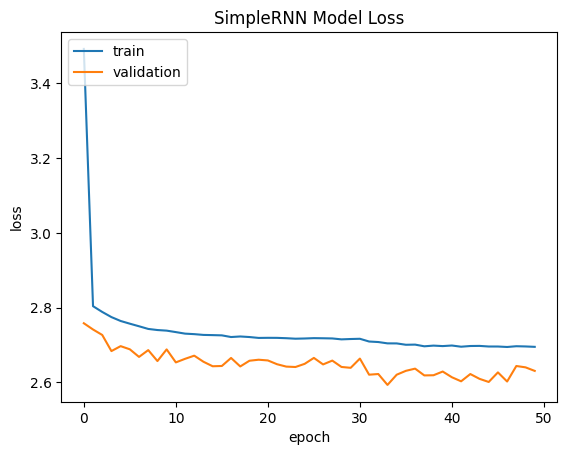

628/628 [==============================] - 2s 4ms/step - loss: 2.6307 - accuracy: 0.2503
Testing results for SimpleRNN model: [2.630737781524658, 0.2502739727497101]


In [43]:
# Train the new SimpleRNN model
history_simple_rnn = model_simple_rnn.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history_simple_rnn.history['accuracy'])
plt.plot(history_simple_rnn.history['val_accuracy'])
plt.title('SimpleRNN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_simple_rnn.history['loss'])
plt.plot(history_simple_rnn.history['val_loss'])
plt.title('SimpleRNN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate the new model
results_simple_rnn = model_simple_rnn.evaluate(x_test, y_test)
print('Testing results for SimpleRNN model:', results_simple_rnn)


In [46]:
def predict_next_chars(model, input_text, chars_to_indices, indices_to_chars, maxlen, num_chars=10):
    input_text = input_text.lower()
    generated_text = input_text

    for _ in range(num_chars):
        input_seq = np.zeros((1, maxlen, len(chars_to_indices)), dtype=bool)
        for t, char in enumerate(generated_text[-maxlen:]):
            if char in chars_to_indices:
                input_seq[0, t, chars_to_indices[char]] = 1

        prediction = model.predict(input_seq)
        next_index = np.argmax(prediction)
        next_char = indices_to_chars[next_index]

        generated_text += next_char

    return generated_text

# Define the input sequence
input_text = "machin "
predicted_sequence = predict_next_chars(model_simple_rnn, input_text, chars_to_indices, indices_to_chars, maxlen, num_chars=10)

print(f"The predicted sequence after '{input_text}' is '{predicted_sequence}'")


1/1 [==============================] - 0s 25ms/step
The predicted sequence after 'machin ' is 'machin tere sert '
